In [2]:
import os
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
from rich import print_json
from IPython.display import display
import seaborn
import geopandas

ModuleNotFoundError: No module named 'rich'

In [3]:
listeLabosINS2I=(("CMP",{244423}), ("CRAN",{185180,1001}), ("CREATIS",{139739}), ("CRIL",{90448,1628}), ("CRISTAL",{410272,389110,388977,390300,183073,111636,24885,2546,186929}), ("DI ENS",{25027}),("CROSSING (IRL)",{1063106}), ("ETIS",{1003474,1061575,1087906,1003348}), ("FILOFOCS (UMI)", {1006288,1006289}), ("GIPSA-Lab",{1043333,1042376,24470}), ("GREYC",{150}), ("G-SCOP",{1043137,1041927,74240}),("HEUDIASYC",{389870}), ("I3S",{13009, 552896, 1079434}),("ICUBE",{217648,1073080}), ("IDRIS",{1823}), ("IPAL  (IRL)", {542003,220880,138926}), ("IRIF",{1005016,444497}), ("IRISA",{491183,491231,490899,491188,1092618,491177,1092619,490900,419364,419370,105128,2494,25255,419365,419367,491230,419363,419366,491232,419362,1099404,545024,1099406,1099401,1099402,1099435, 525233, 1088566, 1088569, 495900, 489780, 1092631, 1092630, 1092628, 1092632, 1092626, 1092625, 1092629}), ("IRIT",{34499,1082335}), ("ISIR",{541937,96164}), ("JFLI",{542009,229050}), ("L2S",{1051117,1289}),("LAAS",{459}),("LABRI",{3102}), ("LAB-STICC",{486345,491660,199324,81533,1089048}), ("LAMIH",{1067790,1303}), ("LAMSADE",{989}), ("LIG",{1043301, 1041964,24471}),("LIGM",{1001627,3210}), ("LIMOS",{1063677,490706,857}),("LIP",{35418}),("LIP6",{541703,233,1095103}),("LIPN",{1000994,994,1086916,1056718}),("LIRIS",{2003,1086665}), ("LIRMM",{181,1071941}), ("LIS",{527033,199402,199394,862,178374}), ("LISN",{1061259,1041968,247329,2544,1050003,81750}), ("LIX",{2071,1041697,1071530,1070048}),("LMF",{1065710}), ("LORIA",{206040,466633}),("LS2N",{1088564,473973,95421,1693,21439}),("LMF-LSV",{1065710,1042689,2571}),("MDLS",{210816}),("RELAX",{1040410,528907}),("ROOT (IRL)", {389700}),("STMS",{541779,1374}), ("TIMA",{1043043,1044023,640}),("TIMC IMAG",{1043049,1070489,1042061,707,574002,555959,1056575}),("VERIMAG",{1043148,1041816,194}))

In [4]:
premierId = True
for labo in listeLabosINS2I:
    #print(labo)
    if premierId:
        listeIds = "("
    for id in labo[1]:
        if not premierId:
            listeIds += " OR "
        else:
            premierId = False
        listeIds += str(id)
listeIds += ")"

In [6]:
print(listeIds)

(244423 OR 1001 OR 185180 OR 139739 OR 90448 OR 1628 OR 410272 OR 183073 OR 388977 OR 2546 OR 186929 OR 111636 OR 24885 OR 389110 OR 390300 OR 25027 OR 1063106 OR 1003474 OR 1087906 OR 1003348 OR 1061575 OR 1006288 OR 1006289 OR 1042376 OR 1043333 OR 24470 OR 150 OR 74240 OR 1043137 OR 1041927 OR 389870 OR 552896 OR 13009 OR 1079434 OR 217648 OR 1073080 OR 1823 OR 220880 OR 542003 OR 138926 OR 1005016 OR 444497 OR 545024 OR 1099401 OR 1092618 OR 1092619 OR 1099404 OR 1099402 OR 1099406 OR 1092625 OR 1092626 OR 490899 OR 490900 OR 1092628 OR 1092630 OR 1092631 OR 1092632 OR 1092629 OR 495900 OR 419362 OR 419363 OR 419364 OR 419365 OR 419366 OR 25255 OR 105128 OR 491177 OR 419370 OR 419367 OR 1099435 OR 491183 OR 525233 OR 491188 OR 489780 OR 1088566 OR 1088569 OR 2494 OR 491230 OR 491231 OR 491232 OR 34499 OR 1082335 OR 541937 OR 96164 OR 542009 OR 229050 OR 1289 OR 1051117 OR 459 OR 3102 OR 199324 OR 1089048 OR 486345 OR 491660 OR 81533 OR 1067790 OR 1303 OR 989 OR 1041964 OR 1043301 O

In [6]:
# _t : insensible à la casse
keywords = "(quantum OR quantique OR qubit OR qbit)"
query = "q=title_t:"+keywords+"&q=abstract_t:"+keywords

In [65]:
query = "q="+keywords

In [5]:
anneeDebut = 2010
anneeFin = 2023

In [96]:
recherche = query+"&fq=structId_i:"+listeIds+"&fq=producedDateY_i:["+str(anneeDebut)+" TO "+str(anneeFin)+"]&fl=authFullName_s,title_s&facet=true&facet.pivot=producedDateY_i,docType_s&wt=json"

In [97]:
evolutionINS2I = pd.DataFrame()
for x in range(anneeDebut,anneeFin+1):
    data = {
        "Année" : [x],
        "Total" : [0],
        "COMM" : [0],
        "ART" : [0],
        "COUV" : [0],
        "DOUV" : [0],
        "OUV" : [0],
        "THESE" : [0],
        "HDR" : [0],
        "SOFTWARE" : [0],
    }
    evolutionINS2I = pd.concat([evolutionINS2I, pd.DataFrame(data)], ignore_index=True)
evolutionINS2I.set_index(['Année'], inplace=True)

In [98]:
print(evolutionINS2I)

       Total  COMM  ART  COUV  DOUV  OUV  THESE  HDR  SOFTWARE
Année                                                         
2010       0     0    0     0     0    0      0    0         0
2011       0     0    0     0     0    0      0    0         0
2012       0     0    0     0     0    0      0    0         0
2013       0     0    0     0     0    0      0    0         0
2014       0     0    0     0     0    0      0    0         0
2015       0     0    0     0     0    0      0    0         0
2016       0     0    0     0     0    0      0    0         0
2017       0     0    0     0     0    0      0    0         0
2018       0     0    0     0     0    0      0    0         0
2019       0     0    0     0     0    0      0    0         0
2020       0     0    0     0     0    0      0    0         0
2021       0     0    0     0     0    0      0    0         0
2022       0     0    0     0     0    0      0    0         0
2023       0     0    0     0     0    0      0    0   

In [99]:
#Exécution de la requête unique
try:
    requete = "https://api.archives-ouvertes.fr/search/CNRS/?"+recherche
    print(requete)
    reponses = requests.get(requete, timeout=(300,300))
except requests.ReadTimeout:
    print ("temps limite atteint")
j = json.loads(reponses.text)
#print(json.dumps(j, indent=3))
liste = j['facet_counts']['facet_pivot']['producedDateY_i,docType_s']

https://api.archives-ouvertes.fr/search/CNRS/?q=title_t:(quantum OR quantique OR qubit OR qbit)&q=abstract_t:(quantum OR quantique OR qubit OR qbit)&fq=structId_i:(244423 OR 1001 OR 185180 OR 139739 OR 90448 OR 1628 OR 410272 OR 183073 OR 388977 OR 2546 OR 186929 OR 111636 OR 24885 OR 389110 OR 390300 OR 25027 OR 1063106 OR 1003474 OR 1087906 OR 1003348 OR 1061575 OR 1006288 OR 1006289 OR 1042376 OR 1043333 OR 24470 OR 150 OR 74240 OR 1043137 OR 1041927 OR 389870 OR 552896 OR 13009 OR 1079434 OR 217648 OR 1073080 OR 1823 OR 220880 OR 542003 OR 138926 OR 1005016 OR 444497 OR 545024 OR 1099401 OR 1092618 OR 1092619 OR 1099404 OR 1099402 OR 1099406 OR 1092625 OR 1092626 OR 490899 OR 490900 OR 1092628 OR 1092630 OR 1092631 OR 1092632 OR 1092629 OR 495900 OR 419362 OR 419363 OR 419364 OR 419365 OR 419366 OR 25255 OR 105128 OR 491177 OR 419370 OR 419367 OR 1099435 OR 491183 OR 525233 OR 491188 OR 489780 OR 1088566 OR 1088569 OR 2494 OR 491230 OR 491231 OR 491232 OR 34499 OR 1082335 OR 541937

In [100]:
for donnees in  liste:
    annee = donnees['value']
    #print (annee, " : ")
    for statsAnnee in donnees['pivot']:
        if statsAnnee['value'] in evolutionINS2I:
            #print (statsAnnee['value']," : ",statsAnnee['count'])
            evolutionINS2I.loc[annee,statsAnnee['value']] += statsAnnee['count'] #addition pour tenir compte des différents ids des labos
            evolutionINS2I.loc[annee,'Total'] += statsAnnee['count'] #cela assure que le total correspond aux seuls types de publications retenus

display(evolutionINS2I)

,Total,COMM,ART,COUV,DOUV,OUV,THESE,HDR,SOFTWARE
Année,,,,,,,,,
2010,21,10,7,2,0,0,2,0,0
2011,17,6,7,1,0,0,3,0,0
2012,21,10,11,0,0,0,0,0,0
2013,16,7,9,0,0,0,0,0,0
2014,18,4,11,1,0,1,1,0,0
2015,26,8,15,0,0,0,3,0,0
2016,42,21,19,0,0,1,0,1,0
2017,55,25,29,0,0,0,1,0,0
2018,54,22,30,1,0,0,1,0,0


In [101]:
print (reponses.text)

{
  "response":{"numFound":756,"start":0,"maxScore":10.75099,"numFoundExact":true,"docs":[
      {
        "title_s":["Single-Qubit Cross Platform Comparison of Quantum Computing Hardware"],
        "authFullName_s":["Adrien Suau",
          "Jon Nelson",
          "Marc Vuffray",
          "Andrey Y. Lokhov",
          "Lukasz Cincio",
          "Carleton Coffrin"]},
      {
        "title_s":["Quantum Information Techniques for Quantum Metrology",
          "Techniques d'Information Quantique pour la Métrologie Quantique"],
        "authFullName_s":["Nathan Shettell"]},
      {
        "title_s":["A Near-Minimal Axiomatisation of ZX-Calculus for Pure Qubit Quantum Mechanics"],
        "authFullName_s":["Renaud Vilmart"]},
      {
        "title_s":["Factory-based Fault-tolerant Preparation of Quantum Polar Codes Encoding One logical Qubit"],
        "authFullName_s":["Ashutosh Goswami",
          "Mehdi Mhalla",
          "Valentin Savin"]},
      {
        "title_s":["Apprentissage 

Text(0, 0.5, 'Nombre total de publications (conférences + revues)')

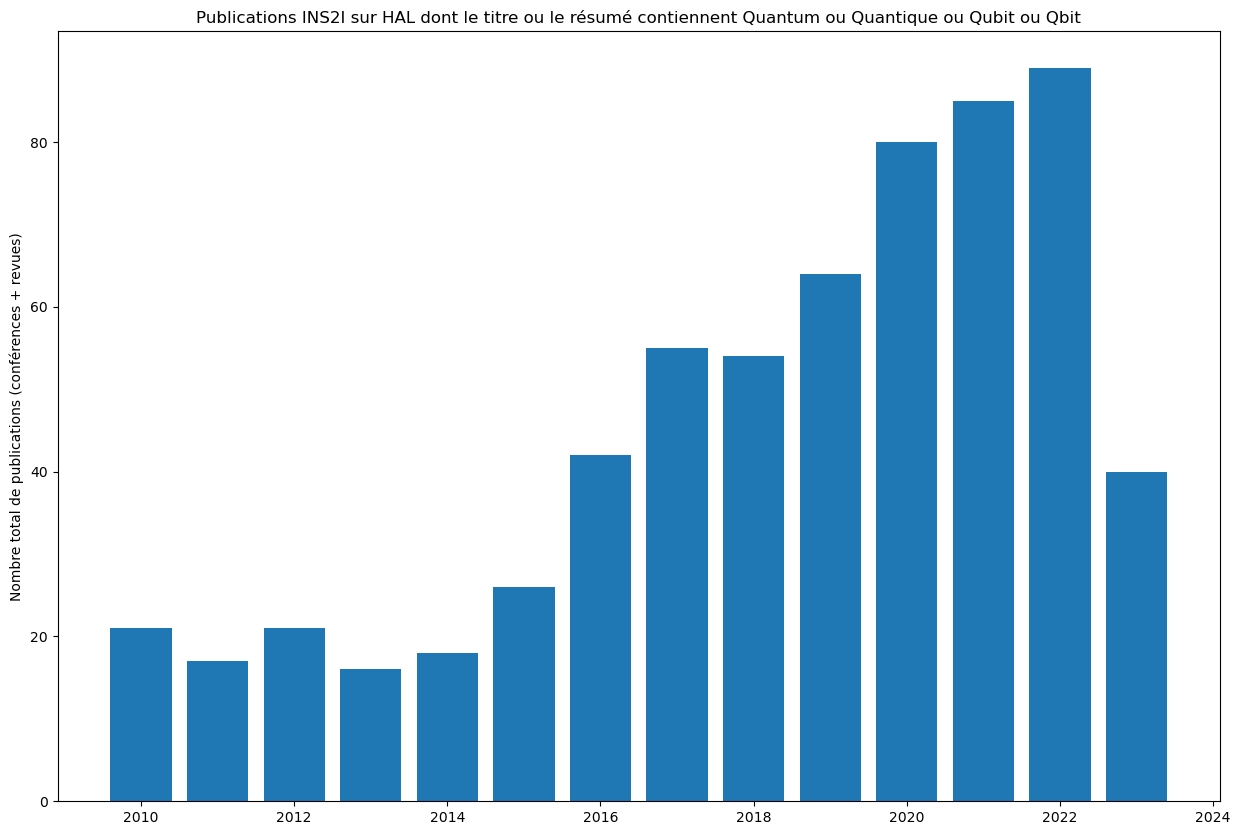

In [102]:
plt.figure(figsize=(15,10))
plt.bar(evolutionINS2I.index,evolutionINS2I['Total'])
plt.title("Publications INS2I sur HAL dont le titre ou le résumé contiennent Quantum ou Quantique ou Qubit ou Qbit")
plt.ylabel("Nombre total de publications (conférences + revues)")

In [7]:
statsParAnneeLabo = pd.DataFrame()
for labo in listeLabosINS2I:
    print(labo)
    evolutionLabo = pd.DataFrame()
    for x in range(anneeDebut,anneeFin+1):
        data = {
            "Année" : [x],
            "Nom":labo[0],
            "Total" : [0],
            "COMM" : [0],
            "ART" : [0],
            "COUV" : [0],
            "DOUV" : [0],
            "OUV" : [0],
            "THESE" : [0],
            "HDR" : [0]
        }
        evolutionLabo = pd.concat([evolutionLabo, pd.DataFrame(data)], ignore_index=True)
    evolutionLabo.set_index(['Année'], inplace=True)
    listeIds = "("
    premierId = True
    for id in labo[1]:
        if not premierId:
            listeIds += " OR "
        else:
            premierId = False
        listeIds += str(id)
    listeIds += ")"
    recherche = query+"&fq=structId_i:"+listeIds+"&fq=producedDateY_i:["+str(anneeDebut)+" TO "+str(anneeFin)+"]&rows=0&indent=true&wt=json&facet=true&facet.pivot=producedDateY_i,docType_s"
    print (recherche)
    try:
        reponses = requests.get("https://api.archives-ouvertes.fr/search/CNRS/?"+recherche, timeout=(300,300))
    except requests.ReadTimeout:
        print ("temps limite atteint")
    j = json.loads(reponses.text)
    #print(json.dumps(j, indent=3))
    for donnees in  j['facet_counts']['facet_pivot']['producedDateY_i,docType_s']:
        annee = donnees['value']
        #print (annee, " : ")
        for statsAnnee in donnees['pivot']:
            if statsAnnee['value'] in evolutionLabo:
                #print (statsAnnee['value']," : ",statsAnnee['count'])
                evolutionLabo.loc[annee,statsAnnee['value']] += statsAnnee['count'] #addition pour tenir compte des différents ids des labos
                evolutionLabo.loc[annee,'Total'] += statsAnnee['count']
    #display(evolutionLabo)
    statsParAnneeLabo = pd.concat([statsParAnneeLabo, evolutionLabo])
display(statsParAnneeLabo)

('CMP', {244423})
q=title_t:(quantum OR quantique OR qubit OR qbit)&q=abstract_t:(quantum OR quantique OR qubit OR qbit)&fq=structId_i:(244423)&fq=producedDateY_i:[2010 TO 2023]&rows=0&indent=true&wt=json&facet=true&facet.pivot=producedDateY_i,docType_s
('CRAN', {1001, 185180})
q=title_t:(quantum OR quantique OR qubit OR qbit)&q=abstract_t:(quantum OR quantique OR qubit OR qbit)&fq=structId_i:(1001 OR 185180)&fq=producedDateY_i:[2010 TO 2023]&rows=0&indent=true&wt=json&facet=true&facet.pivot=producedDateY_i,docType_s
('CREATIS', {139739})
q=title_t:(quantum OR quantique OR qubit OR qbit)&q=abstract_t:(quantum OR quantique OR qubit OR qbit)&fq=structId_i:(139739)&fq=producedDateY_i:[2010 TO 2023]&rows=0&indent=true&wt=json&facet=true&facet.pivot=producedDateY_i,docType_s
('CRIL', {90448, 1628})
q=title_t:(quantum OR quantique OR qubit OR qbit)&q=abstract_t:(quantum OR quantique OR qubit OR qbit)&fq=structId_i:(90448 OR 1628)&fq=producedDateY_i:[2010 TO 2023]&rows=0&indent=true&wt=json&f

,Nom,Total,COMM,ART,COUV,DOUV,OUV,THESE,HDR
Année,,,,,,,,,
2010,CMP,0,0,0,0,0,0,0,0
2011,CMP,0,0,0,0,0,0,0,0
2012,CMP,0,0,0,0,0,0,0,0
2013,CMP,0,0,0,0,0,0,0,0
2014,CMP,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2019,VERIMAG,0,0,0,0,0,0,0,0
2020,VERIMAG,0,0,0,0,0,0,0,0
2021,VERIMAG,0,0,0,0,0,0,0,0


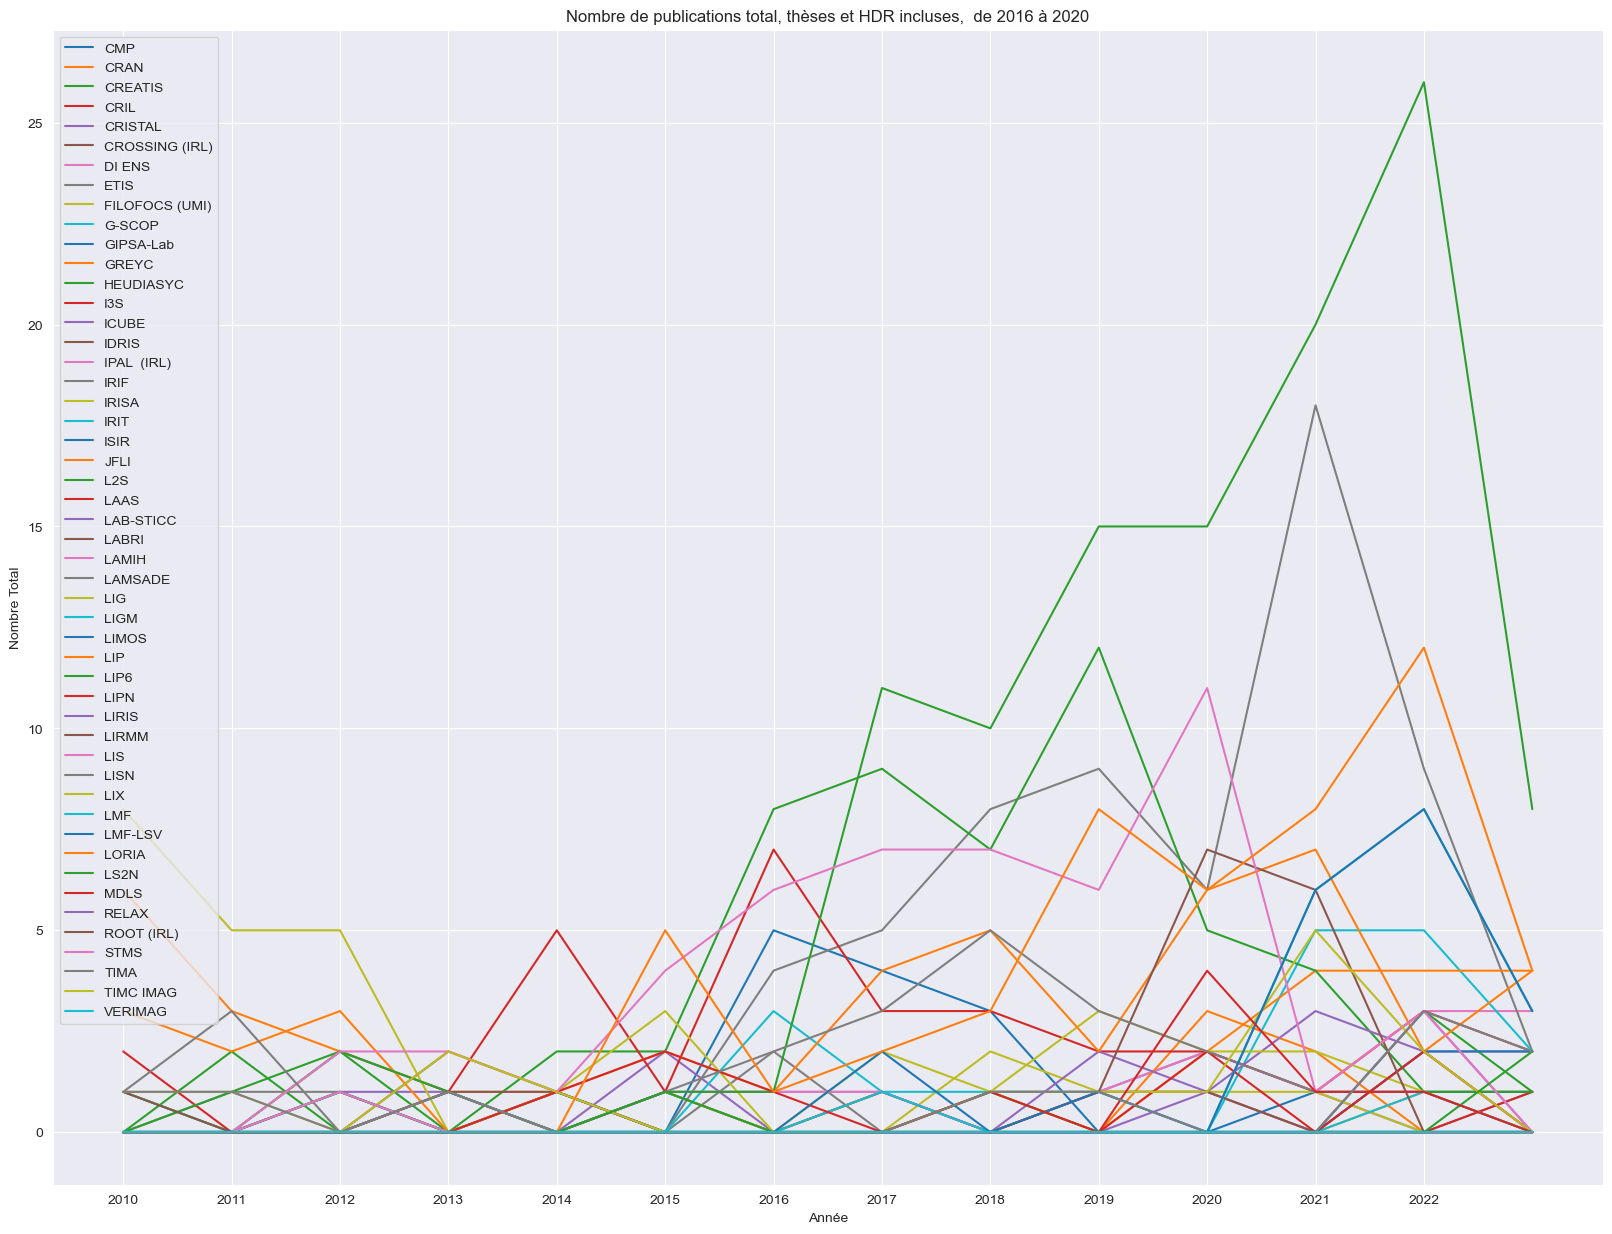

In [8]:
statsParAnneeLabo.groupby('Nom')['Total'].plot(title='Nombre de publications total, thèses et HDR incluses,  de 2016 à 2020',figsize=(20,15))
plt.xticks(np.arange(anneeDebut,anneeFin,step=1))
plt.ylabel("Nombre Total")
plt.legend()
plt.grid(True)

In [9]:
statsPourPivot = statsParAnneeLabo.reset_index(inplace=False)
ins2iTotalPubli = statsPourPivot.pivot(index="Nom", columns=["Année"], values='Total')
display(ins2iTotalPubli)

Année,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Nom,,,,,,,,,,,,,,
CMP,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CRAN,6,3,2,1,1,0,0,0,0,1,1,0,1,1
CREATIS,0,2,0,0,0,1,0,0,0,0,0,0,3,1
CRIL,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CRISTAL,0,0,1,0,0,0,0,0,1,1,2,1,0,0
CROSSING (IRL),0,0,0,0,0,0,0,0,0,0,0,0,0,0
DI ENS,0,0,0,0,1,0,0,1,0,1,2,1,3,3
ETIS,0,0,2,1,0,0,2,0,0,0,0,0,0,1
FILOFOCS (UMI),0,0,0,0,0,0,0,0,0,0,0,0,0,0


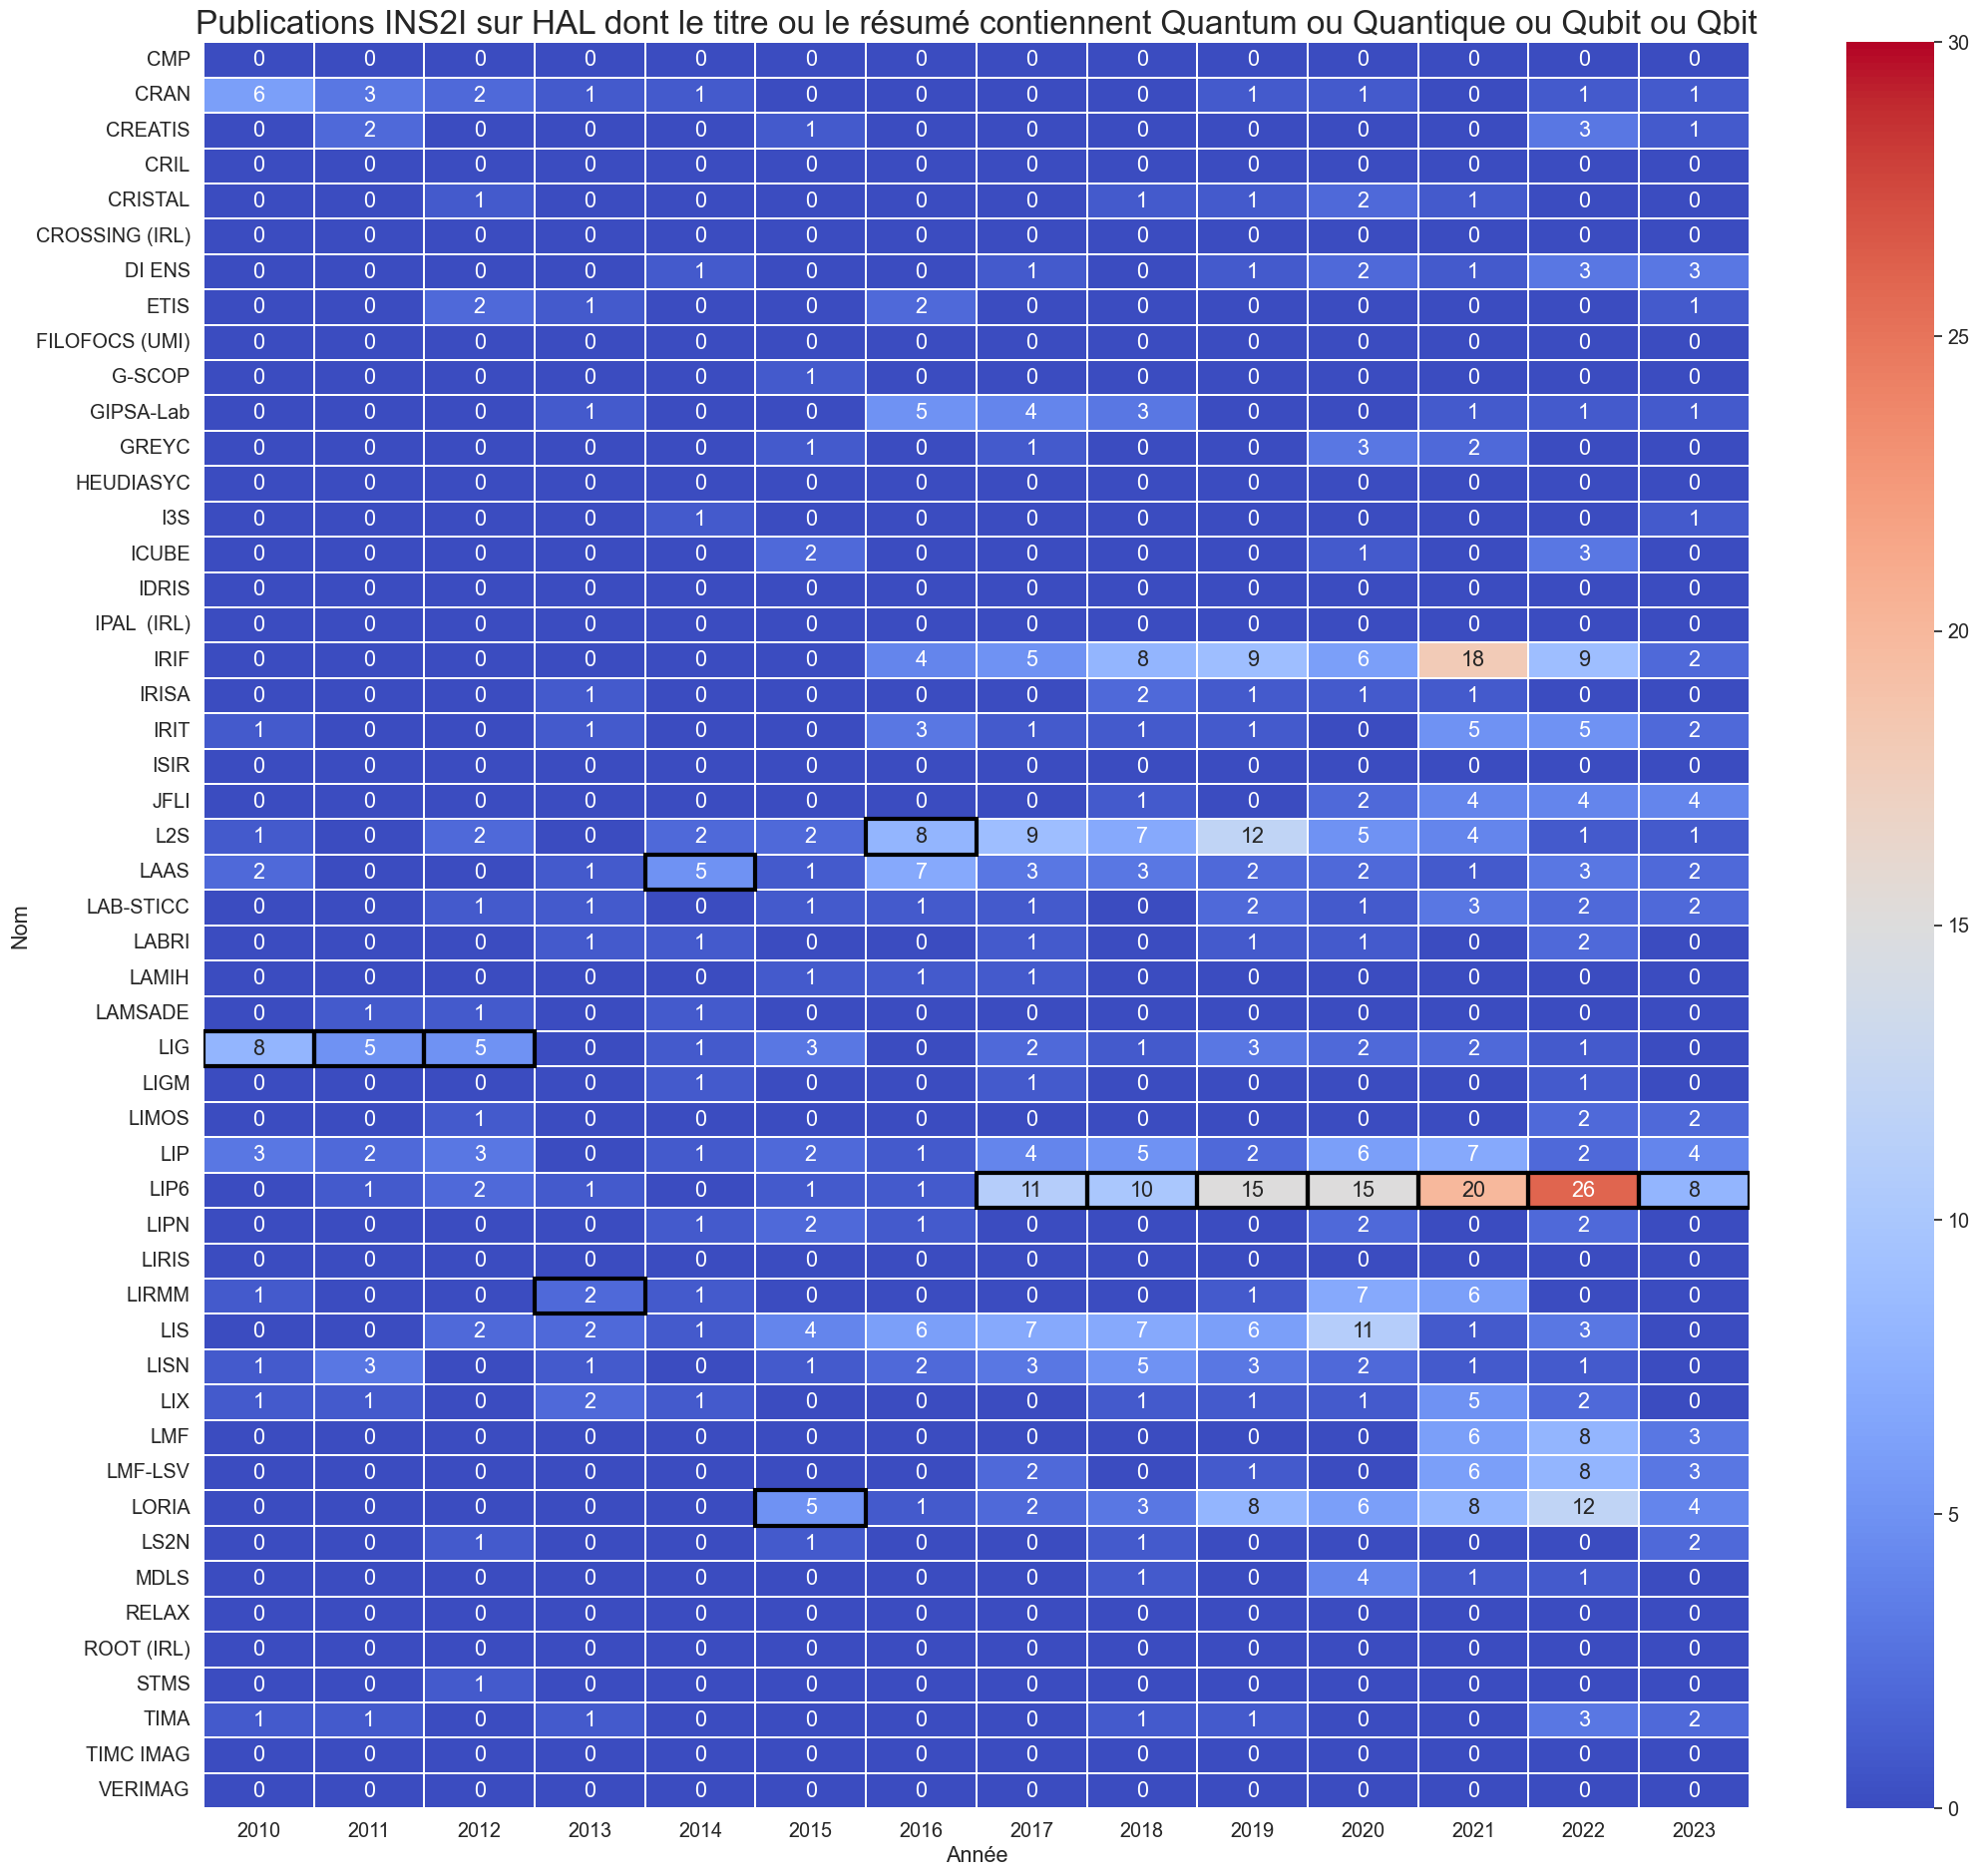

In [11]:
import seaborn as sns
from matplotlib.patches import Rectangle
plt.figure(figsize=(25,23))
sns.set(font_scale = 1.3)
ax = sns.heatmap(ins2iTotalPubli, cmap ='coolwarm', linewidths = 0.30, annot = True, vmax=30, fmt='d')
ax.set_title("Publications INS2I sur HAL dont le titre ou le résumé contiennent Quantum ou Quantique ou Qubit ou Qbit", fontsize=24)
column_max = ins2iTotalPubli.idxmax(axis=0)

for col, variable in enumerate(ins2iTotalPubli.columns):
    position = ins2iTotalPubli.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='black', lw=3))